# Sampling on the Coupling Strength $D_j$

**Yuning Zhang, TU Delft, 2021.10.13**

Study the distribution of coupling strength $D_j$. The location of spin in a disordered ensemble are randomly generated, and the coupling strengths between the central spin and the bath are calculated from the locations.


In [21]:
include("SpinEnsemble.jl")
include("Visualization.jl")

visual_effective_beta (generic function with 1 method)

In [2]:
import Distributions: Normal, loglikelihood, fit, pdf, params

The system is characterized by following parameters 
```
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
```
The central spin is always distributed in zero point and the default z axis (background field) is $(0,0,1)$.

## Basic Distribution and corresponding FID

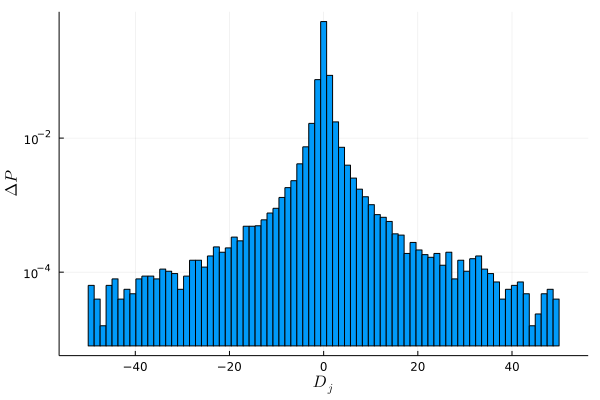

max: 27673.313946600232 min: -17395.56033902498
avg: 0.3401593276375129 std: 129.1762322553169


In [37]:
D_sample=rand_bath_dipolar_coefs(10^5,3,1);
visual_coupling(D_sample,bound=(-50,50),bin_num=80, logscale=:true)

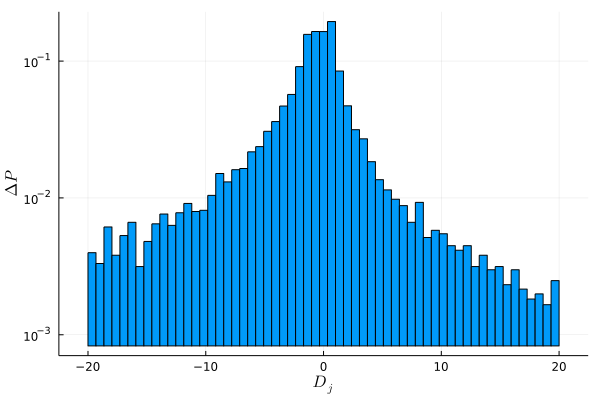

max: 61.355077749130714 min: -122.4440632755411
avg: -3.9299882972337263 std: 16.38618729946268


In [43]:
D_sample=rand_bath_dipolar_coefs(10^4,3,(0.2,1), method=:spherical);
visual_coupling(D_sample,logscale=:true)

### Varying spin density, see how large is the $D_j$ at top 5% (0.95)

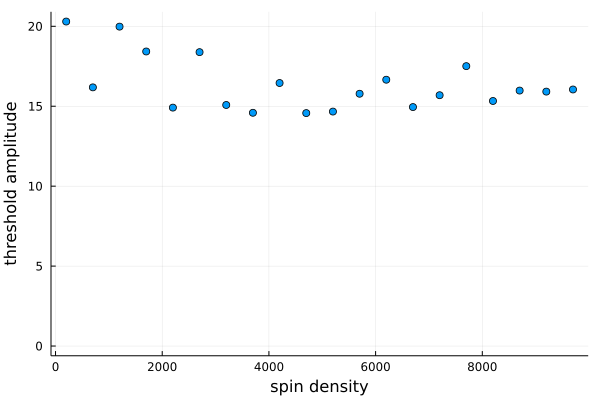

In [63]:
f_list=[100.0*n for n in 2:5:100]
h_s=map(x->transverse_threshold(0.95,x,3,1.0),f_list)
scatter(f_list, h_s,
yrange=[0,maximum(h_s)],
xlabel="spin density",
label=:false,
ylabel="threshold amplitude")

we can fix the density since the scale of $D_j$ doesn't vary with it.

### Varying area scale, see how large is the $D_j$  at top 5% (0.95)

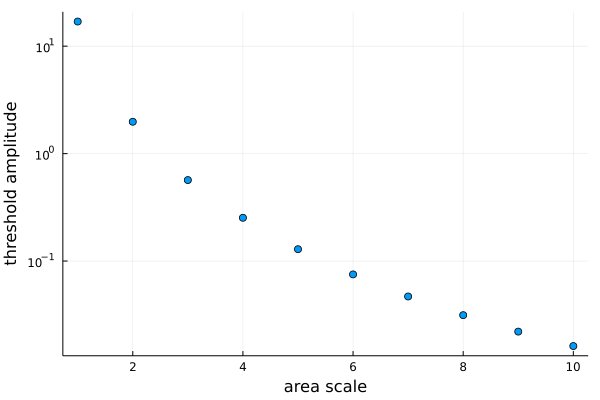

In [64]:
a_list=1:10
h_s=map(x->transverse_threshold(0.95,10^3,3,x),a_list)
scatter(a_list, h_s,
yaxis=:log,
label=:false,
xlabel="area scale",
ylabel="threshold amplitude")

**Plot the normalized distribution under different distributed area**

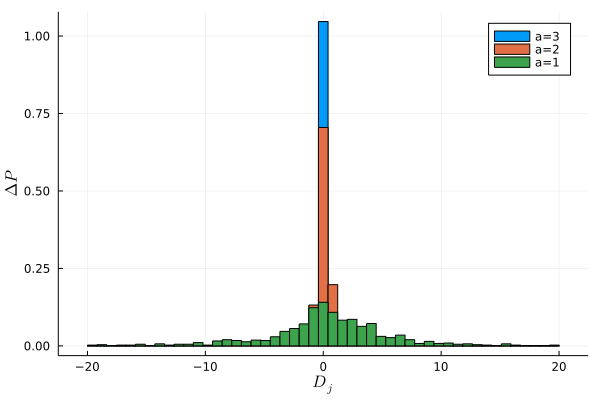

In [65]:
a_list=1:3
d=3
f=10^3
sample=map(x->rand_bath_dipolar_coefs(x^d*f,d,x),a_list)
bin_set=range(-20/1^d, 20/1^d, length = 50)
fig=histogram(reverse(sample), bins = bin_set,
xlabel=L"D_j", 
ylabel=L"\Delta P",
label=reverse(["a=1" "a=2" "a=3"]),
norm=:true)

The distribution is peaked more and more as the distributed area growing, since there are more spins in the bath that is far. 

In [133]:
"""
generate a sampling of beta with size M, visualize it
========================
Args:
    M: size of sampling
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
"""
function visual_effective_beta(sample::AbstractArray{Float64}; bin_num=60::Int, use_abs=:false, fitting=:true)
    if use_abs 
        sample=abs.(sample)
    end

    fig=histogram(sample, bins = bin_num, xlabel=L"\beta_p", ylabel=L"\Delta P", norm=true,label="Beta Sample")
    println("max: ",maximum(sample)," min: ",minimum(sample))
    println("avg: ", mean(sample),"std: ",std(sample))
    
    if fitting
        normal_est=fit(Normal{Float64},sample)
        mu,sigma=params(normal_est)
        bins=LinRange(mu-4sigma,mu+4sigma,bin_num*2+1)
        plot!(bins,pdf(normal_est,bins),linecolor=:red,linestyle=:dash,label="Normal Distribution")
        println("likelihood: ", ℯ^loglikelihood(normal_est,sample))
    end

    display(fig)
end;

In [121]:
# N::Int, d::Int,a::Real;
D_set=rand_bath_dipolar_coefs(500,3,1.0);
beta_sample=[beta_sampling(D_set) for i in 1:10^5];

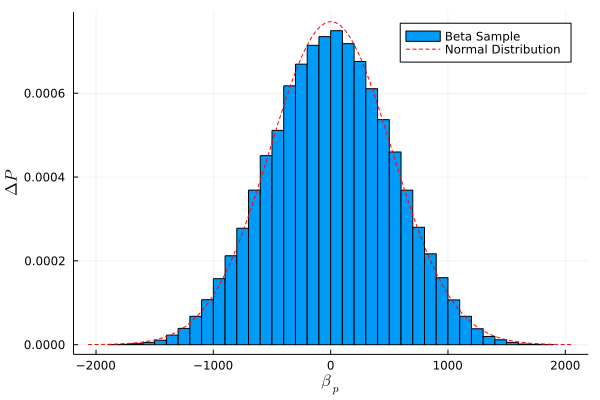

max: 1819.7855106470993 min: -1813.0388197683621
avg: 1.6971078933600605std: 517.3728990620982
likelihood: 0.0


In [130]:
visual_effective_beta(beta_sample,bin_num=50)

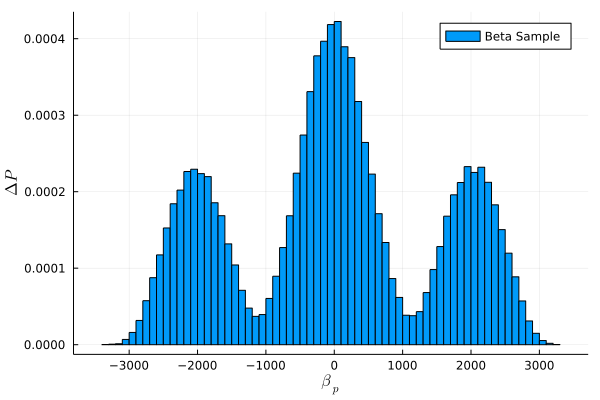

max: 3256.0288422637677 min: -3309.6526676243893
avg: 0.5450139082377334std: 1496.4201194725852


In [149]:
D_set=rand_bath_dipolar_coefs(500,3,1.0);
beta_sample=[beta_sampling(D_set) for i in 1:10^5];
visual_effective_beta(beta_sample,bin_num=70,fitting=:false)

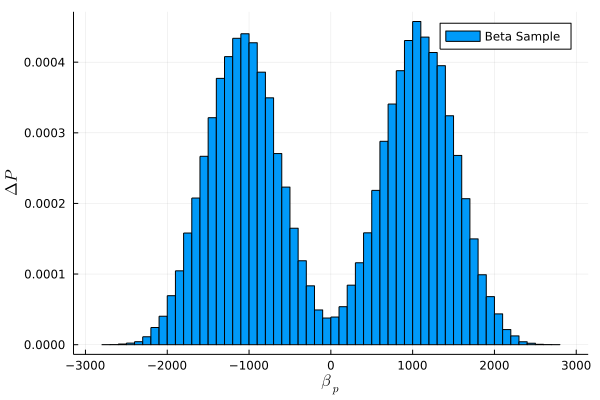

max: 2758.689346954492 min: -2715.41195253642
avg: 3.307204036145913std: 1171.2589326844343


In [152]:
D_set=rand_bath_dipolar_coefs(500,3,1.0);
beta_sample=[beta_sampling(D_set) for i in 1:10^5];
visual_effective_beta(beta_sample,bin_num=70,fitting=:false)